<a href="https://colab.research.google.com/github/KwajaG8/hello/blob/main/origa1_for_main_model_Kwaja_editing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir
import tensorflow as tf
from tqdm import tqdm
from glob import glob
from PIL import Image
import imageio
from albumentations import HorizontalFlip, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion
import pandas as pd

import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras import *
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image, ImageOps
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers 
from tensorflow.keras.utils import to_categorical
import keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler

In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split,learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda,MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D,MaxPool2D,MaxPooling2D,AvgPool2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
import PIL
import random
from IPython.display import clear_output
from tqdm import tqdm_notebook, tnrange
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
#from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
import cv2 as cv
import cv2
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!unzip "/content/drive/MyDrive/Classroom/origa-20230420T091406Z-001.zip"

Archive:  /content/drive/MyDrive/Classroom/origa-20230420T091406Z-001.zip
  inflating: origa/readme.txt        
  inflating: origa/manual_labels.xlsx  
  inflating: origa/manual marking.rar  
  inflating: origa/manual marking/manual marking/629.mat  
  inflating: origa/manual marking/manual marking/625.mat  
  inflating: origa/manual marking/manual marking/626.mat  
  inflating: origa/manual marking/manual marking/648.mat  
  inflating: origa/manual marking/manual marking/633.mat  
  inflating: origa/manual marking/manual marking/650.mat  
  inflating: origa/manual marking/manual marking/619.mat  
  inflating: origa/manual marking/manual marking/627.mat  
  inflating: origa/manual marking/manual marking/618.mat  
  inflating: origa/manual marking/manual marking/622.mat  
  inflating: origa/manual marking/manual marking/628.mat  
  inflating: origa/manual marking/manual marking/632.mat  
  inflating: origa/manual marking/manual marking/615.mat  
  inflating: origa/manual marking/manual 

array([0, 1, 2], dtype=uint8)

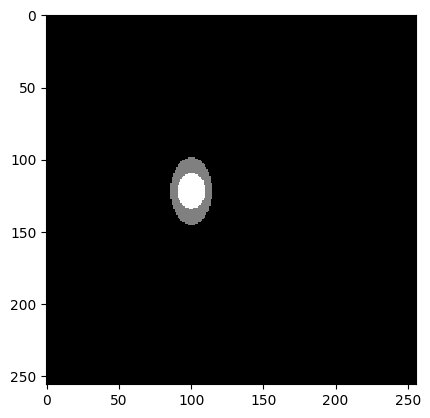

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from PIL import Image

import scipy.io
data=scipy.io.loadmat('/content/origa/manual marking/manual marking/007.mat')
mask=cv2.resize(data['mask'],(256,256))
plt.imshow(mask,interpolation='nearest',cmap='gray')
np.unique(mask)


In [8]:
mylist1 = mask.copy()
mylist2 = mask.copy()

mylist1[mylist1 > 1] = 0
mylist2[mylist2 < 2] = 0

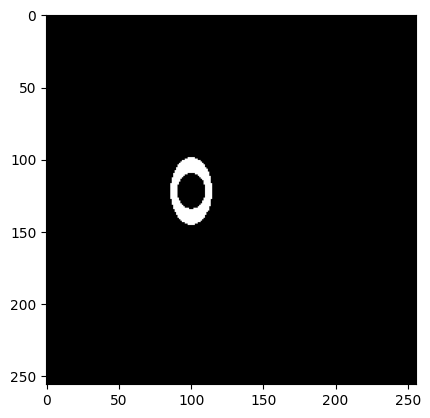

In [9]:
plt.imshow(mylist1,cmap='gray')

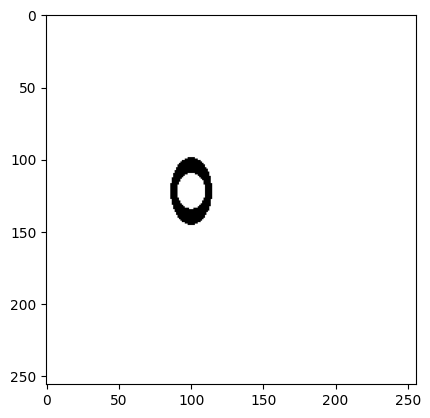

In [10]:
image=~mylist1
plt.imshow(image,cmap='gray')

In [11]:
np.unique(mylist1)

array([0, 1], dtype=uint8)

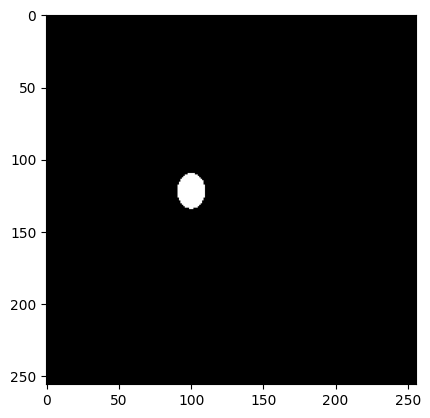

In [12]:
plt.imshow(mylist2,cmap='gray')

In [13]:
np.unique(mylist2)

array([0, 2], dtype=uint8)

In [14]:
print(data['mask'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
n=len(data['mask'])
print(n)

2048


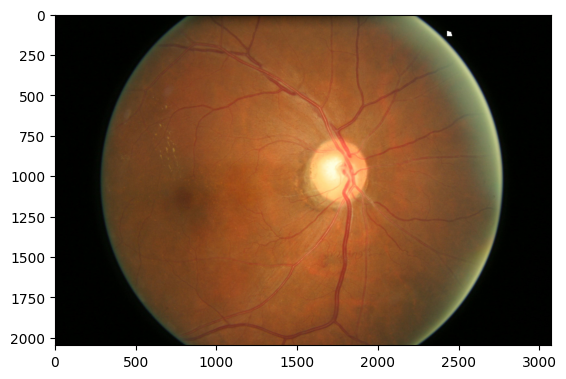

In [16]:
img=np.array(Image.open("/content/origa/images/images/592.jpg"))
plt.imshow(img)

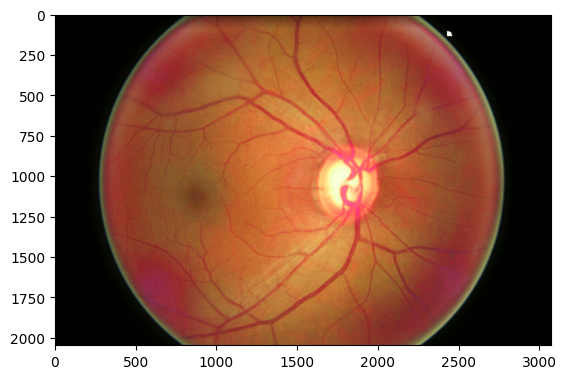

In [17]:
#img=cv2.imread('/content/gdrive/MyDrive/origa/origa/images/images/001.jpg',1)
img=np.array(Image.open("/content/origa/images/images/001.jpg"))

b,g,r=cv2.split(img)
lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(lab_img)
eq=cv2.equalizeHist(h)
img_=cv2.merge((eq,s,v))
img1=cv2.cvtColor(img_,cv2.COLOR_HSV2BGR)

clahe=cv2.createCLAHE(clipLimit=1.0,tileGridSize=(8,8))
cl=clahe.apply(h)
_img=cv2.merge((cl,s,v))
img2=cv2.cvtColor(_img,cv2.COLOR_HSV2BGR)
plt.imshow(img2)

In [18]:

! rm -rf 'dataset'
os.mkdir('dataset')
os.mkdir('dataset/trainimages')
os.mkdir('dataset/trainimages/train')
os.mkdir('dataset/trainmasks')
os.mkdir('dataset/trainmasks/train/')

In [19]:
folders=sorted(os.listdir("/content/origa/images/images/"))


# from keras.preprocessing.image import save_img
for folder in folders:
  img=np.array(Image.open("/content/origa/images/images/"+folder))
  img=cv2.resize(img,(256,256))
  b,g,r=cv2.split(img)
  lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h,s,v=cv2.split(lab_img)

  clahe=cv2.createCLAHE(clipLimit=1.0,tileGridSize=(8,8))
  cl=clahe.apply(h)
  _img=cv2.merge((cl,s,v))
  img2=cv2.cvtColor(_img,cv2.COLOR_HSV2BGR)
  #plt.imshow(img2)
  
  img_dst = os.path.join('dataset/trainimages', 'train/')
  im = Image.fromarray(img2)
  im.save(img_dst+folder+'.png')
   

In [20]:
folders1=sorted(os.listdir("/content/origa/manual marking/manual marking/"))
for folder in folders1:
  data = scipy.io.loadmat('/content/origa/manual marking/manual marking/'+folder)
  mask=cv2.resize(data['mask'],(256,256))
  mylist1 = mask.copy()
  mylist2 = mask.copy()
  #mylist3 = data['mask'].copy()
  mylist1[mylist1 == 2] = 0
  mylist2[mylist2 == 1] = 0
  mylist2[mylist2 == 2] = 1
  final_mask = np.dstack([mylist1, mylist2,mylist1*mylist2])
 
  mask_dst = os.path.join('dataset/trainmasks', 'train/')
  # img_dst1 = os.path.join('dataset/testimages', 'test/')
  # mask_dst1 = os.path.join('dataset/testmasks', 'test/')

  # mask = np.expand_dims(mask, -1)
  tf.keras.utils.save_img(mask_dst+folder+'.png', final_mask,scale = False )

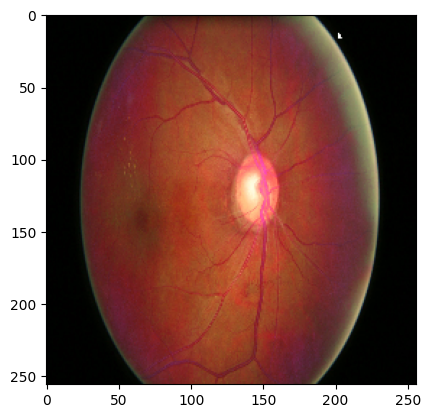

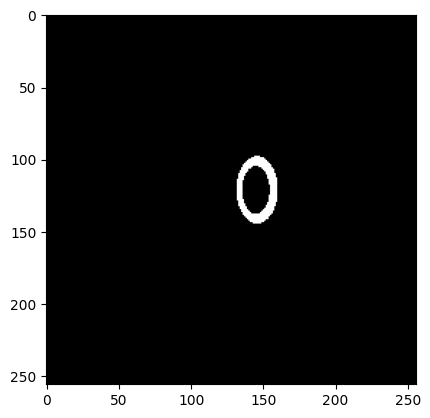

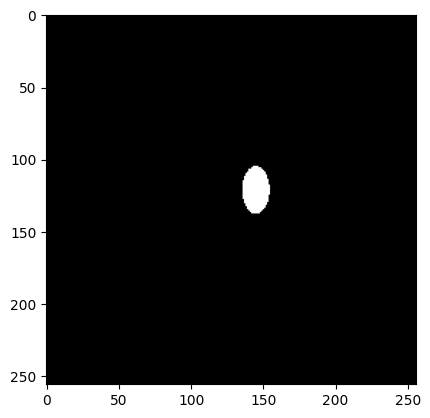

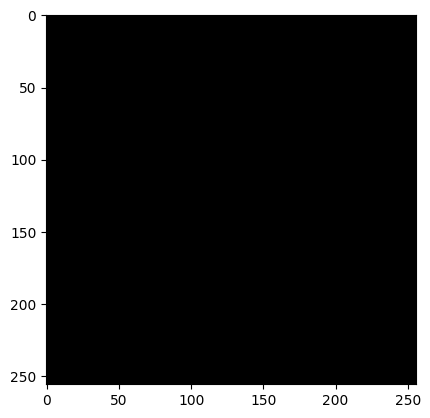

(256, 256, 3)

In [21]:
img=np.array(Image.open("/content/dataset/trainimages/train/592.jpg.png"))
plt.imshow(img)
plt.show()

img1=np.array(Image.open("/content/dataset/trainmasks/train/592.mat.png"))
plt.imshow(img1[:,:,0]*255,cmap='gray')
plt.show()
img1=np.array(Image.open("/content/dataset/trainmasks/train/592.mat.png"))
plt.imshow(img1[:,:,1]*255,cmap='gray')
plt.show()
img1=np.array(Image.open("/content/dataset/trainmasks/train/592.mat.png"))
plt.imshow(img1[:,:,2]*255,cmap='gray')
plt.show()


img1.shape


In [22]:
train_files = glob("/content/dataset/trainimages/train/*.png")
mask_files = glob("/content/dataset/trainmasks/train/*.png")

In [23]:
train_files.sort()
mask_files.sort()

In [24]:
print(len(train_files))
print(len(mask_files))

576
576


In [25]:
df = pd.DataFrame({"image_path": train_files, "mask_path": mask_files})
# a={"image_path": train_files, "mask_path": mask_files}
# df = pd.DataFrame.from_dict(a, orient='index')
# df = df.transpose()

In [26]:
df

,image_path,mask_path
0,/content/dataset/trainimages/train/001.jpg.png,/content/dataset/trainmasks/train/001.mat.png
1,/content/dataset/trainimages/train/002.jpg.png,/content/dataset/trainmasks/train/002.mat.png
2,/content/dataset/trainimages/train/003.jpg.png,/content/dataset/trainmasks/train/003.mat.png
3,/content/dataset/trainimages/train/004.jpg.png,/content/dataset/trainmasks/train/004.mat.png
4,/content/dataset/trainimages/train/005.jpg.png,/content/dataset/trainmasks/train/005.mat.png
...,...,...
571,/content/dataset/trainimages/train/646.jpg.png,/content/dataset/trainmasks/train/646.mat.png
572,/content/dataset/trainimages/train/647.jpg.png,/content/dataset/trainmasks/train/647.mat.png
573,/content/dataset/trainimages/train/648.jpg.png,/content/dataset/trainmasks/train/648.mat.png
574,/content/dataset/trainimages/train/649.jpg.png,/content/dataset/trainmasks/train/649.mat.png


In [27]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=0.1, shuffle = False)
df_train, df_val = train_test_split(df_train,test_size=0.22, shuffle = False)
print(df_train.values.shape)
print(df_val.values.shape)
print(df_test.values.shape)


(404, 2)
(114, 2)
(58, 2)


In [28]:
df_test

,image_path,mask_path
518,/content/dataset/trainimages/train/582.jpg.png,/content/dataset/trainmasks/train/582.mat.png
519,/content/dataset/trainimages/train/583.jpg.png,/content/dataset/trainmasks/train/583.mat.png
520,/content/dataset/trainimages/train/585.jpg.png,/content/dataset/trainmasks/train/585.mat.png
521,/content/dataset/trainimages/train/586.jpg.png,/content/dataset/trainmasks/train/586.mat.png
522,/content/dataset/trainimages/train/587.jpg.png,/content/dataset/trainmasks/train/587.mat.png
523,/content/dataset/trainimages/train/588.jpg.png,/content/dataset/trainmasks/train/588.mat.png
524,/content/dataset/trainimages/train/589.jpg.png,/content/dataset/trainmasks/train/589.mat.png
525,/content/dataset/trainimages/train/590.jpg.png,/content/dataset/trainmasks/train/590.mat.png
526,/content/dataset/trainimages/train/592.jpg.png,/content/dataset/trainmasks/train/592.mat.png
527,/content/dataset/trainimages/train/593.jpg.png,/content/dataset/trainmasks/train/593.mat.png


In [29]:
batch_size = 4
h = ch =  256#image height
w = cw = 256 # image width

# Training path
#X_path= os.path.join('dataset', 'trainimages') # input image
#Y_path = os.path.join('dataset', 'trainmasks') # ground-truth label

# Train data generator
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

seed = 1 # the same seed is applied to both image_ and mask_generator
image_generator1 = image_datagen.flow_from_dataframe(
    df_train,
    x_col='image_path',
    target_size=(h, w),
    batch_size=batch_size,
    shuffle = True, # shuffle the training data
    class_mode=None, # set to None, in this case
    color_mode = 'rgb',
#     interpolation='nearest',
#     interpolation='area',
    seed=seed,)
    # subset = 'training')

mask_generator1 = mask_datagen.flow_from_dataframe(
    df_train,
    x_col='mask_path',
    target_size=(h, w),
    color_mode='rgb',
    batch_size=batch_size,
    shuffle = True,
    class_mode=None,
#     interpolation='nearest',
#     interpolation='area',
    seed=seed,)
    # subset = 'training')

# combine image_ and mask_generator into one
train_gen = zip(image_generator1, mask_generator1)
num_train = len(image_generator1)

#X1_path= os.path.join('dataset', 'validationimages') # input image
#Y1_path = os.path.join('dataset', 'validationmasks') # ground-truth label


image_generator2 = image_datagen.flow_from_dataframe(
    df_val,
    x_col='image_path',
    target_size=(h, w),
    batch_size=batch_size,
    shuffle = True, # shuffle the training data
    class_mode=None, # set to None, in this case
    color_mode = 'rgb',
#     interpolation='nearest',
#     interpolation='area',
    seed=seed,)
    # subset = 'training')

mask_generator2 = mask_datagen.flow_from_dataframe(
    df_val,
    x_col='mask_path',
    target_size=(h, w),
    color_mode='rgb',
    batch_size=batch_size,
    shuffle = True,
    class_mode=None,
#     interpolation='nearest',
#     interpolation='area',
    seed=seed,)
    # subset = 'training')

# combine image_ and mask_generator into one
val_gen = zip(image_generator2, mask_generator2)
num_train = len(image_generator2)

image_generator3 = image_datagen.flow_from_dataframe(
    df_test,
    x_col='image_path',
    target_size=(h, w),
    batch_size=batch_size,
    shuffle = True, # shuffle the training data
    class_mode=None, # set to None, in this case
    color_mode = 'rgb',
#     interpolation='nearest',
#     interpolation='area',
    seed=seed,)
    # subset = 'training')

mask_generator3 = mask_datagen.flow_from_dataframe(
    df_test,
    x_col='mask_path',
    target_size=(h, w),
    color_mode='rgb',
    batch_size=batch_size,
    shuffle = True,
    class_mode=None,
#     interpolation='nearest',
#     interpolation='area',
    seed=seed,)
    # subset = 'training')

# combine image_ and mask_generator into one
test_gen = image_generator3
num_train = len(image_generator3)


Found 404 validated image filenames.
Found 404 validated image filenames.
Found 114 validated image filenames.
Found 114 validated image filenames.
Found 58 validated image filenames.
Found 58 validated image filenames.


In [30]:
from keras.layers import Input, Dense, Reshape

def gtb(input,c):
    
    m_batchsize, width, height, c= input.shape
#     print(m_batchsize, width, height, c)
    
    Q = Conv2D(c, 3, padding="same")(input)
#     print("q",Q.shape)
    Q = tf.keras.layers.GlobalAveragePooling2D(keepdims=True)(Q)
#     print("Q",Q.shape)
    
    
    K = Conv2D(c,3, padding="same")(input)
#     print("K",K.shape)
    K = Reshape(target_shape=(c,width*height))(K)
#     print("k",K.shape)
    K = Permute(dims=(2,1))(K)
#     print("k",K.shape)
    
    V = Conv2D(c, 3, padding="same")(input)
#     print("V",V.shape)
    V = Reshape(target_shape=(c,width*height))(V)
#     print("V",V.shape)
    V = Permute(dims=(2,1))(V)
#     print("V",V.shape)
    
#     print("Q",Q.shape)
#     print("K",K.shape)
    
    f=tf.keras.layers.Multiply()([K,Q])
    
    #f=tf.keras.layers.Dense(c//8, activation='softmax')
    
#     print("f",f.shape)
    
    #print("f",f.shape.as_list())
#     print("V",V.shape)
    
    y=tf.keras.activations.softmax(f)
    
#     print("y----",tf.shape(y))
    
    y=tf.keras.layers.Multiply()([V,y])
    
#     print("y------",y.shape)

    y= Conv2D(c, 1, padding="same")(y) 

    y = Reshape(target_shape=(width,height,c))(y)
    output= y + input 
    return output

In [31]:
def TEblock(input,c):
    x = Conv2D(c, 1, padding="same")(input)
    x = Activation("relu")(x)
    
    output=gtb(input,c)
    
    #output = Conv2D(c, 1, padding="same")(output)
    
    output= output + input
    output = BatchNormalization()(output)
    output = Activation("relu")(output)
    return output

In [32]:
def aspp_block(x, num_filters, rate_scale=1):
    x1 = Conv2D(num_filters, (3, 3), dilation_rate=(6 * rate_scale, 6 * rate_scale), padding="same")(x)
    x1 = BatchNormalization()(x1)

    x2 = Conv2D(num_filters, (3, 3), dilation_rate=(12 * rate_scale, 12 * rate_scale), padding="same")(x)
    x2 = BatchNormalization()(x2)

    x3 = Conv2D(num_filters, (3, 3), dilation_rate=(18 * rate_scale, 18 * rate_scale), padding="same")(x)
    x3 = BatchNormalization()(x3)

    x4 = Conv2D(num_filters, (3, 3), padding="same")(x)
    x4 = BatchNormalization()(x4)

    y = Add()([x1, x2, x3, x4])
    y = Conv2D(num_filters, (1, 1), padding="same")(y)
    return y

In [33]:
def RDDB(x,y,nf1,nf2,gc,bias=True):
    x1 = Conv2D(filters=gc, kernel_size=3, strides=1,padding='same', use_bias=bias)(x)
    x1 = LeakyReLU(alpha=0.25)(x1)
    
    y1 = Conv2D(filters=gc, kernel_size=3, strides=1,padding='same', use_bias=bias)(y)
    y1 = LeakyReLU(alpha=0.25)(y)
    
    x1c = Conv2D(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(x)
    x1c = LeakyReLU(alpha=0.25)(x1c)
    y1t = Conv2DTranspose(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(y)
    y1t = LeakyReLU(alpha=0.25)(y1t)
    
    
    x2_input = concatenate([x,x1,y1t],axis=-1)
    x2 = Conv2D(filters= gc, kernel_size=3,strides=1, padding='same',use_bias=bias)(x2_input)
    x2 = LeakyReLU(alpha=0.25)(x2)
    
    y2_input = concatenate([y,y1,x1c],axis=-1)
    y2 = Conv2D(filters= gc, kernel_size=3,strides=1, padding='same',use_bias=bias)(y2_input)
    y2 = LeakyReLU(alpha=0.25)(y2)
    
    x2c = Conv2D(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(x1)
    x2c = LeakyReLU(alpha=0.25)(x2c)
    y2t = Conv2DTranspose(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(y1)
    y2t = LeakyReLU(alpha=0.25)(y2t)
    
    
    
    x3_input = concatenate([x,x1,x2,y2t] , axis=-1)
    x3 = Conv2D(filters= gc, kernel_size=3,strides=1, padding='same', use_bias=bias)(x3_input)
    x3 = LeakyReLU(alpha=0.25)(x3)
    
    y3_input = concatenate([y,y1,y2,x2c] , axis=-1)
    y3 = Conv2D(filters= gc, kernel_size=3,strides=1, padding='same', use_bias=bias)(y3_input)
    y3 = LeakyReLU(alpha=0.25)(y3)
    
    x3c = Conv2D(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(x3)
    x3c = LeakyReLU(alpha=0.25)(x3c)
    y3t = Conv2DTranspose(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(y3)
    y3t = LeakyReLU(alpha=0.25)(y3t)
    
    
        
    x4_input = concatenate([x,x1,x2,x3,y3t] , axis=-1)
    x4 = Conv2D(filters= gc, kernel_size=3,strides=1, padding='same', use_bias=bias)(x4_input)
    x4 = LeakyReLU(alpha=0.25)(x4)
    
    
    y4_input = concatenate([y,y1,y2,y3,x3c] , axis=-1)
    y4 = Conv2D(filters= gc, kernel_size=3,strides=1, padding='same', use_bias=bias)(y4_input)
    y4 = LeakyReLU(alpha=0.25)(y4)
    
    x4c = Conv2D(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(x4)
    x4c = LeakyReLU(alpha=0.25)(x4c)
    y4t = Conv2DTranspose(filters=gc, kernel_size=3, strides=2,padding='same', use_bias=bias)(y4)
    y4t = LeakyReLU(alpha=0.25)(y4t)
    
        
    x5_input = concatenate([x,x1,x2,x3,x4,y4t] , axis=-1)
    x5 = Conv2D(filters= nf1, kernel_size=3,strides=1, padding='same', use_bias=bias)(x5_input)
    x5 = LeakyReLU(alpha=0.25)(x5)
    
    y5_input = concatenate([y,y1,y2,y3,y4,x4c] , axis=-1)
    y5 = Conv2D(filters= nf2, kernel_size=3,strides=1, padding='same', use_bias=bias)(y5_input)
    y5 = LeakyReLU(alpha=0.25)(y5)
        
    x5 = Lambda(lambda x: x * 0.4)(x5)
    y5 = Lambda(lambda x: x * 0.4)(y5)
        
    return Add()([x5,x]),Add()([y5,y])

In [34]:
def attention(e,d,num_filters):
#     print("d----",d.shape,num_filters)
    x1 = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(d)
    Ad = Conv2D(num_filters, 1, padding="same",activation="sigmoid")(x1)
    Ae = Conv2D(num_filters, 1, padding="same")(e)
    m = tf.keras.layers.Average()([Ad,Ae])
    mul=tf.keras.layers.Multiply()([m, e])
    #Add=tf.keras.layers.Add()([mul,e])
    #T=Conv2D(num_filters, 3, padding="same",activation="relu")(Add)
    #con=Concatenate()([T, x1])
    S = Conv2D(num_filters, 3, padding="same")(mul)
    S = BatchNormalization()(S)   
    S = Activation("relu")(S)
    return S

In [35]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x
    
def encoder_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)
    
    x = gtb(x,num_filters)
    p = MaxPool2D((2, 2))(x)
    
    return x, p 

def dec_conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    # x = tf.keras.layers.GroupNormalization(groups=32,axis=-1,epsilon=0.001,center=True,scale=True,
    #                                        beta_initializer='zeros',gamma_initializer='ones',
    #                                        beta_regularizer=None,gamma_regularizer=None,
    #                                        beta_constraint=None,gamma_constraint=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    #     x = Conv2D(num_filters, 3, padding="same")(x)
    #     x = BatchNormalization()(x)  #Not in the original network
    #     x = Activation("relu")(x)

    return x

#Decoder block
#skip features gets input from encoder for concatenation

# def decoder_block(input, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

def decoder_block(input, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    a = attention(skip_features,input,num_filters)
    x = dec_conv_block(a, num_filters)
    return x

#Build Unet using the blocks
def build_net(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)     #64 - 16
    s2, p2 = encoder_block(p1, 64)        #128 - 32
    s3, p3 = encoder_block(p2, 128)        #256 - 64
    s4, p4 = encoder_block(p3, 256)       #512 - 128
                                          #1024 - 512 

    b1 = aspp_block(p4, 512) #Bridge
#   b1 = gif(b1)


    n12,n22 = RDDB(s1,s2,32,64,8)
    pred2 = Conv2D(1,(1,1), strides=(1,1), padding="same",activation='sigmoid')(n12)
    
    n32,n42 = RDDB(s3,s4,128,256,32)
    
    n12,n22 = RDDB(n12,n22,32,64,8)
    pred3 = Conv2D(1,(1,1), strides=(1,1), padding="same",activation='sigmoid')(n12)
    
    n32,n42 = RDDB(n32,n42,128,256,32)
    
    n22,n32 = RDDB(n22,n32,64,128,16)
    
    
    n13,n23 = RDDB(n12,n22,32,64,8)
    
    n33,n43 = RDDB(n32,n42,128,256,32)
    
    n23,n33 = RDDB(n23,n33,64,128,16)
    
    n13,n23 = RDDB(n12,n22,32,64,8)
    
    n33,n43 = RDDB(n32,n42,128,256,32)
    
    n13 = Lambda(lambda x: x * 0.4)(n13)
    n23 = Lambda(lambda x: x * 0.4)(n23)
    n33 = Lambda(lambda x: x * 0.4)(n33)
    n43 = Lambda(lambda x: x * 0.4)(n43)
    
    
    s1,s2 = Add()([s1,n13]),Add()([s2,n23])
    s3,s4 = Add()([s3,n33]),Add()([s4,n43])
    
    
    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)
    
    outputs = Conv2D(3, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="NET")
    return model

if __name__ == "__main__":
    input_shape = (256,256,3)
    model = build_net(input_shape)
    model.summary()

Model: "NET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                               

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [37]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision=(true_positives / (predicted_positives + K.epsilon()))
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [38]:
def get_callbacks(model_name):
    callbacks =[]
    tensor_board = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0)
    callbacks.append(tensor_board)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5', verbose=1, monitor='dice_coef',mode='max',save_best_only=True)
    callbacks.append(checkpoint)
    anne = ReduceLROnPlateau(monitor='dice_coef', factor=0.5, patience=2, verbose=2, min_lr=0.0000001,min_delta=0.00001,mode='auto') 
    callbacks.append(anne)
    return callbacks

In [39]:
def dice_coef_class_only_fluids(y_true, y_pred, smooth=1e-7):
    y_true_f = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=3)[...,1:])
    y_pred_f = K.flatten(y_pred[...,1:])
    intersect = K.sum(y_true_f * y_pred_f, axis=-1)
    denom = K.sum(y_true_f + y_pred_f, axis=-1)
    return K.mean((2. * intersect / (denom + smooth)))

In [40]:
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min', 
                              verbose=1, 
                              patience=20
                             )
# save the best model with lower validation loss
checkpointer1 = ModelCheckpoint(filepath="val_loss", 
                               verbose=1, 
                               save_best_only=True,
                               monitor ='val_loss',mode='min'
                              )

checkpointer5 = ModelCheckpoint(filepath="val_dice_coef_class_only_fluids", 
                               verbose=1, 
                               save_best_only=True,save_weights_only=True,
                               monitor ='val_dice_coef_class_only_fluids',mode="max"
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )

In [41]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

In [42]:
def bce_plus_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)
    return (0.4*(1-dice_coef(y_true, y_pred))+0.4*bce)

In [43]:
import tensorflow as tf

In [44]:
#callbacks = get_callbacks('model')

In [45]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["binary_accuracy",iou,dice_coef])

In [46]:
results=model.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=1000) 

Epoch 1/1000
30/30 [==============================] - 121s 640ms/step - loss: 0.4608 - binary_accuracy: 0.8420 - iou: 0.0074 - dice_coef: 0.0148 - val_loss: 0.8095 - val_binary_accuracy: 0.7546 - val_iou: 0.0089 - val_dice_coef: 0.0175
Epoch 2/1000
30/30 [==============================] - 17s 560ms/step - loss: 0.2865 - binary_accuracy: 0.9911 - iou: 0.0094 - dice_coef: 0.0186 - val_loss: 0.7125 - val_binary_accuracy: 0.7565 - val_iou: 0.0086 - val_dice_coef: 0.0170
Epoch 3/1000
30/30 [==============================] - 16s 545ms/step - loss: 0.2071 - binary_accuracy: 0.9946 - iou: 0.0121 - dice_coef: 0.0240 - val_loss: 0.4983 - val_binary_accuracy: 0.8409 - val_iou: 0.0119 - val_dice_coef: 0.0235
Epoch 4/1000
30/30 [==============================] - 17s 580ms/step - loss: 0.1476 - binary_accuracy: 0.9954 - iou: 0.0171 - dice_coef: 0.0337 - val_loss: 0.3324 - val_binary_accuracy: 0.9018 - val_iou: 0.0154 - val_dice_coef: 0.0304
Epoch 5/1000
30/30 [==============================] - 17s 5

KeyboardInterrupt: ignored

In [47]:
model.save('/content/gdrive/MyDrive/origa1_for_main_model_Kwaja_editing')

In [ ]:
# model.load_weights('/content/gdrive/MyDrive/origa1_for_main_model_Kwaja_editing')

In [48]:

import pandas as pd  
 
# Creating an empty list
res=[]
 
# Iterating through the columns of 
# dataframe
for column in df_test.columns:
     
    # Storing the rows of a column 
    # into a temporary list
    li = df_test[column].tolist()
     
    # appending the temporary list
    res.append(li)
     
# Printing the final list
print(res)

[['/content/dataset/trainimages/train/582.jpg.png', '/content/dataset/trainimages/train/583.jpg.png', '/content/dataset/trainimages/train/585.jpg.png', '/content/dataset/trainimages/train/586.jpg.png', '/content/dataset/trainimages/train/587.jpg.png', '/content/dataset/trainimages/train/588.jpg.png', '/content/dataset/trainimages/train/589.jpg.png', '/content/dataset/trainimages/train/590.jpg.png', '/content/dataset/trainimages/train/592.jpg.png', '/content/dataset/trainimages/train/593.jpg.png', '/content/dataset/trainimages/train/594.jpg.png', '/content/dataset/trainimages/train/595.jpg.png', '/content/dataset/trainimages/train/597.jpg.png', '/content/dataset/trainimages/train/598.jpg.png', '/content/dataset/trainimages/train/599.jpg.png', '/content/dataset/trainimages/train/601.jpg.png', '/content/dataset/trainimages/train/602.jpg.png', '/content/dataset/trainimages/train/604.jpg.png', '/content/dataset/trainimages/train/605.jpg.png', '/content/dataset/trainimages/train/606.jpg.png'

In [49]:
df_test

,image_path,mask_path
518,/content/dataset/trainimages/train/582.jpg.png,/content/dataset/trainmasks/train/582.mat.png
519,/content/dataset/trainimages/train/583.jpg.png,/content/dataset/trainmasks/train/583.mat.png
520,/content/dataset/trainimages/train/585.jpg.png,/content/dataset/trainmasks/train/585.mat.png
521,/content/dataset/trainimages/train/586.jpg.png,/content/dataset/trainmasks/train/586.mat.png
522,/content/dataset/trainimages/train/587.jpg.png,/content/dataset/trainmasks/train/587.mat.png
523,/content/dataset/trainimages/train/588.jpg.png,/content/dataset/trainmasks/train/588.mat.png
524,/content/dataset/trainimages/train/589.jpg.png,/content/dataset/trainmasks/train/589.mat.png
525,/content/dataset/trainimages/train/590.jpg.png,/content/dataset/trainmasks/train/590.mat.png
526,/content/dataset/trainimages/train/592.jpg.png,/content/dataset/trainmasks/train/592.mat.png
527,/content/dataset/trainimages/train/593.jpg.png,/content/dataset/trainmasks/train/593.mat.png


In [50]:
from keras.models import load_model 
import random
#data = (df_test,'image_path')
test_img= np.array(Image.open('/content/dataset/trainimages/train/562.jpg.png'))
#test_img = plt.imread(str(['/content/dataset/trainimages/train/IM000004.png']))
test_img_input = cv2.resize(test_img, (256,256),interpolation = cv2.INTER_LINEAR)
(test_img_input,(256,256))
print(test_img_input.shape)

test_img_input=np.expand_dims (test_img_input, 0) 

prediction = (model.predict(test_img_input))

(256, 256, 3)
1/1 [==============================] - 5s 5s/step


In [51]:
test_mask= np.array(Image.open('/content/dataset/trainmasks/train/562.mat.png'))
#test_img = plt.imread(str(['/content/dataset/trainimages/train/IM000004.png']))
test_mask_input = cv2.resize(test_mask, (256,256),interpolation = cv2.INTER_LINEAR)
(test_mask_input,(256,256))
print(test_mask_input.shape)

(256, 256, 3)


In [52]:
prediction.shape

(1, 256, 256, 3)

In [53]:
np.shape((prediction[0][:,:,:]>0.5))

(256, 256, 3)

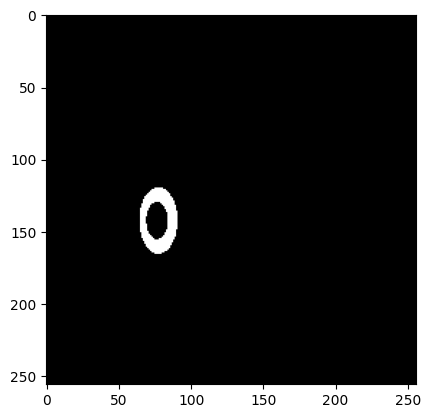

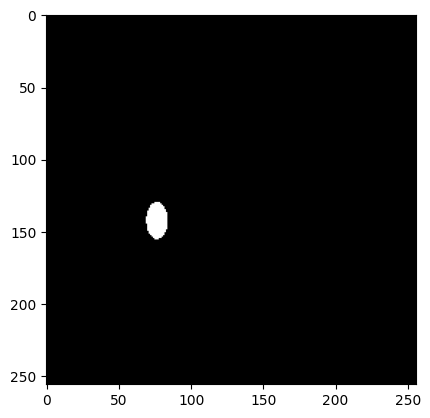

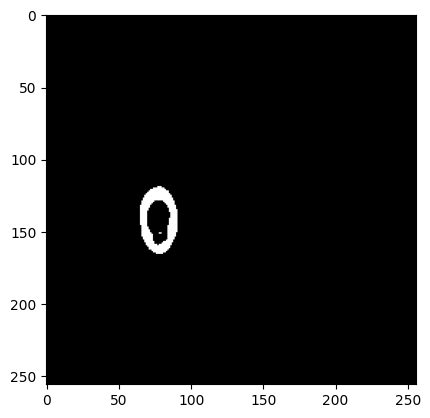

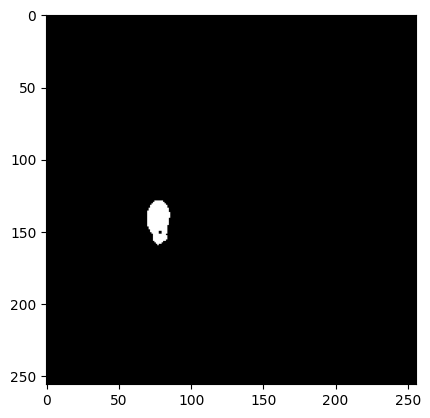

In [54]:
plt.imshow(test_mask[:,:,0],cmap='gray')
plt.show() 
plt.imshow(test_mask[:,:,1],cmap='gray')
plt.show()
plt.imshow((prediction[0][:,:,0]>0.5), cmap='gray')
plt.show() 
plt.imshow((prediction[0][:,:,1]>0.5), cmap='gray')
plt.show()
# plt.imshow((prediction[0][:,:,2]>0.5), cmap='gray')
# plt.show()

In [55]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [56]:
def specifi(x):
  tp,tn,fp,fn=x[0][0],x[1][1],x[0][1],x[1][0]
  return tn/(tn+fp)

def dice_coef(x):
  tp,tn,fp,fn=x[0][0],x[1][1],x[0][1],x[1][0]
  return 2*tp/(2*tp+fp+fn)
def sensitivity(x):
  tp,tn,fp,fn=x[0][0],x[1][1],x[0][1],x[1][0]
  return tp/(tp+fn)
def precision(x):
  tp,tn,fp,fn=x[0][0],x[1][1],x[0][1],x[1][0]
  return tp/(tp+fp)

In [57]:
gts = np.array(test_mask_input[:,:,0], dtype = np.uint8) #label
preds = np.array(prediction[0][:,:,0]> 0.5, dtype = np.uint8) 
lr_precision, lr_recall, _ = precision_recall_curve(gts.ravel(), preds.ravel())
#lr_f1, lr_auc = f1_score(gts.ravel(), preds.ravel()), auc(lr_recall, lr_precision)
ac=accuracy_score(gts.ravel(), preds.ravel())
pr=precision(confusion_matrix(gts.ravel(), preds.ravel()))
re=sensitivity(confusion_matrix(gts.ravel(), preds.ravel()))
spf=specifi(confusion_matrix(gts.ravel(), preds.ravel()))
dc=dice_coef(confusion_matrix(gts.ravel(),preds.ravel()))

In [58]:
#print("for veness")
#print('auc=%.3f' % ( lr_auc))
print("accuracy : {}".format(ac))
print("precision : {}".format(pr))
print("recall/sensitivity : {}".format(re))
print("specificity : {}".format(spf))
#print("f1_score=%.3f "%(lr_f1))
print("dice_coef:{}".format(dc))

accuracy : 0.9980010986328125
precision : 0.9993989087882618
recall/sensitivity : 0.9985831985831986
specificity : 0.9351081530782029
dice_coef:0.9989908871719421


In [59]:
gts = np.array(test_mask_input[:,:,1], dtype = np.uint8) #label
preds = np.array(prediction[0][:,:,1]> 0.5, dtype = np.uint8) 
lr_precision, lr_recall, _ = precision_recall_curve(gts.ravel(), preds.ravel())
#lr_f1, lr_auc = f1_score(gts.ravel(), preds.ravel()), auc(lr_recall, lr_precision)
ac=accuracy_score(gts.ravel(), preds.ravel())
pr=precision(confusion_matrix(gts.ravel(), preds.ravel()))
re=sensitivity(confusion_matrix(gts.ravel(), preds.ravel()))
spf=specifi(confusion_matrix(gts.ravel(), preds.ravel()))
dc=dice_coef(confusion_matrix(gts.ravel(),preds.ravel()))

In [60]:
#print("for arteries")
#print('auc=%.3f' % ( lr_auc))
print("accuracy : {}".format(ac))
print("precision : {}".format(pr))
print("recall/sensitivity : {}".format(re))
print("specificity : {}".format(spf))
#print("f1_score=%.3f "%(lr_f1))
print("dice_coef:{}".format(dc))

accuracy : 0.99853515625
precision : 0.998819633933225
recall/sensitivity : 0.999708481649687
specificity : 0.7861111111111111
dice_coef:0.9992638601334254
